In [ ]:
!pip install pandas matplotlib openpyxl

In [4]:
#Q1 Direct acquaintances of a given user (id=46).
cozo :   ?[p2] :=  *edge[id_e,  p1, p2],*edge_label[id_e, "knows"], p1 =46'
neo4j : 
MATCH (p1)-[:KNOWS]->(p2)  
WHERE p1.id = 46  
RETURN p2.id


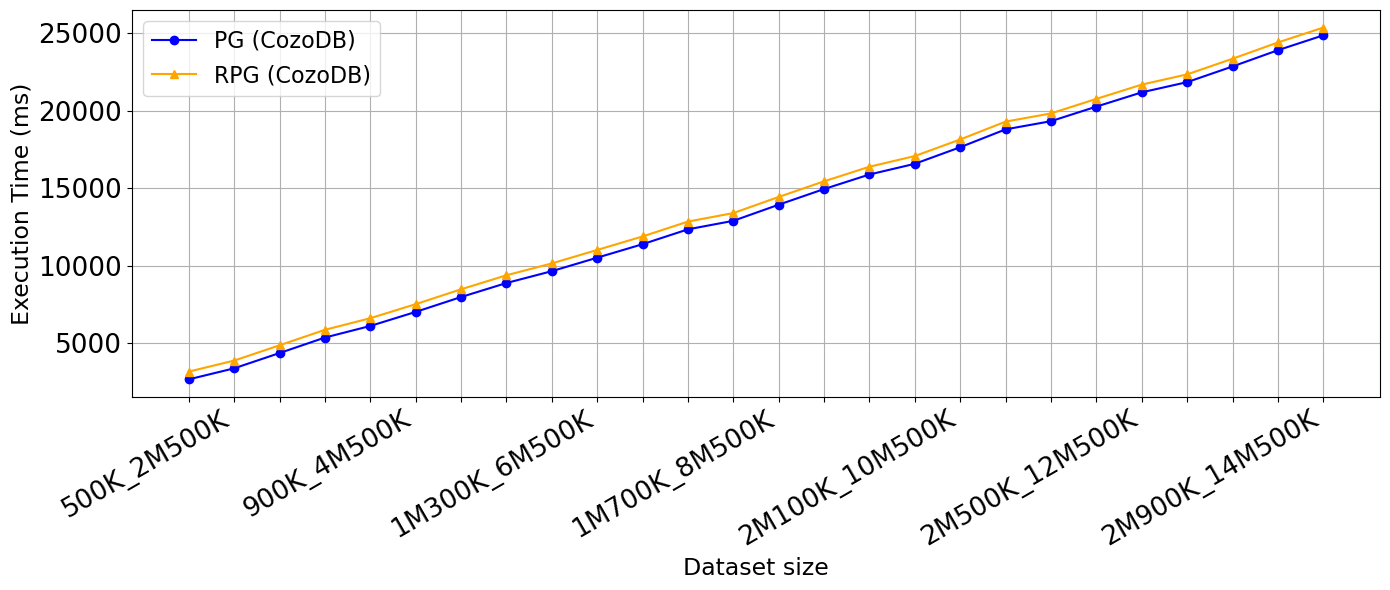

In [1]:
#visualization

import pandas as pd
import matplotlib.pyplot as plt

file_path = "CozoPG_vs_CozoRPG_R1.xlsx"
df = pd.read_excel(file_path)

# Supprimer la dernière ligne
df = df.iloc[:-1]

plt.figure(figsize=(14, 6))

# Tracer les courbes
plt.plot(df['DS_size'], df['CozoPG'], marker='o', color='blue', label='PG (CozoDB)')
plt.plot(df['DS_size'], df['CozoRPG'], marker='^', color='orange', label='RPG (CozoDB)')

# Choisir les labels que tu veux garder visibles
labels_to_show = [
    '100K_500K',
    '500K_2M500K',
    '900K_4M500K',
    '1M300K_6M500K',
    '1M700K_8M500K',
    '2M100K_10M500K',
    '2M500K_12M500K',
    '2M900K_14M500K'
]

# Construire la liste des ticks
xticks = range(len(df['DS_size']))
xticklabels = [lbl if lbl in labels_to_show else "" for lbl in df['DS_size']]

plt.xticks(ticks=xticks, labels=xticklabels, rotation=30, ha='right', fontsize=19)
plt.yticks(fontsize=19)

# Ajouter titre et axes

plt.xlabel("Dataset size", fontsize=17)
plt.ylabel("Execution Time (ms)", fontsize=17)

plt.legend(fontsize=16, loc="best")
plt.grid(True)
plt.tight_layout()

# Sauvegarder le graphique
plt.savefig("graph_CozoPG_vs_CozoRPG_R1.png", dpi=300)
plt.show()


In [ ]:
#Q2 Number of comments liked by a given user where thelength of the comment is lower than 500 characters
cozo :   
?[count(c)] :=
  *node_label[u, "person"],
  *edge[e, u, c],
  *edge_label[e, "likes"],
  *node_label[c, "comment"],
 *node_prop[c, "length",len], len < "500", u = 24


#neo4j : 
MATCH (p:PERSON )-[:LIKES]->(c:COMMENT)
WHERE  toInteger(c.length) < 500 AND  p.id=24  
RETURN count(c) AS nb_comments_liked 





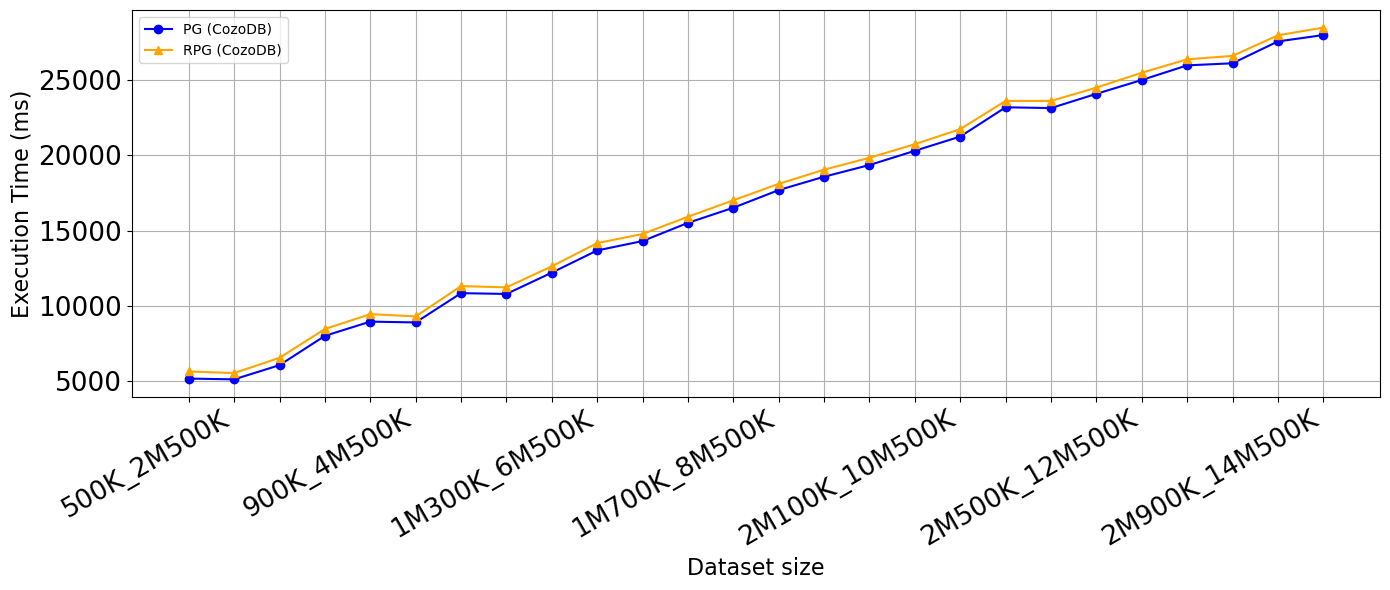

In [2]:
#visualization

import pandas as pd
import matplotlib.pyplot as plt

file_path = "CozoPG_vs_CozoRPG_R2.xlsx"
df = pd.read_excel(file_path)

# Supprimer la dernière ligne
df = df.iloc[:-1]

plt.figure(figsize=(14, 6))

# Tracer les courbes
plt.plot(df['DS_size'], df['CozoPG'], marker='o', color='blue', label='PG (CozoDB)')
plt.plot(df['DS_size'], df['CozoRPG'], marker='^', color='orange', label='RPG (CozoDB)')

# Choisir les labels que tu veux garder visibles
labels_to_show = [
    '100K_500K',
    '500K_2M500K',
    '900K_4M500K',
    '1M300K_6M500K',
    '1M700K_8M500K',
    '2M100K_10M500K',
    '2M500K_12M500K',
    '2M900K_14M500K'
]

# Construire la liste des ticks
xticks = range(len(df['DS_size']))
xticklabels = [lbl if lbl in labels_to_show else "" for lbl in df['DS_size']]

plt.xticks(ticks=xticks, labels=xticklabels, rotation=30, ha='right', fontsize=19)
plt.yticks(fontsize=19)

# Ajouter titre et axes

plt.xlabel("Dataset size", fontsize=16)
plt.ylabel("Execution Time (ms)", fontsize=16)

plt.legend()
plt.grid(True)
plt.tight_layout()

# Sauvegarder le graphique
plt.savefig("graph_CozoPG_vs_CozoRPG_R2.png", dpi=300)
plt.show()

In [ ]:
#Q3 Number of likes of a post having a tag "Health".

#cozo 
?[count(e2)] :=
  *node_label[post, "post"],
  *edge[e1, post, tag],
  *edge_label[e1, "hasTag"],
  *node_prop[tag, "name", tag],
  tag="Health",
 *edge[e2, person, post],
  *edge_label[e2, "likes"]
  
#neo4j
MATCH (t:TAG)<-[:HASTAG]-(post:POST)<-[l:LIKES]-(person:PERSON)
WHERE t.name="Health"
RETURN count(l) AS nb_likes

  



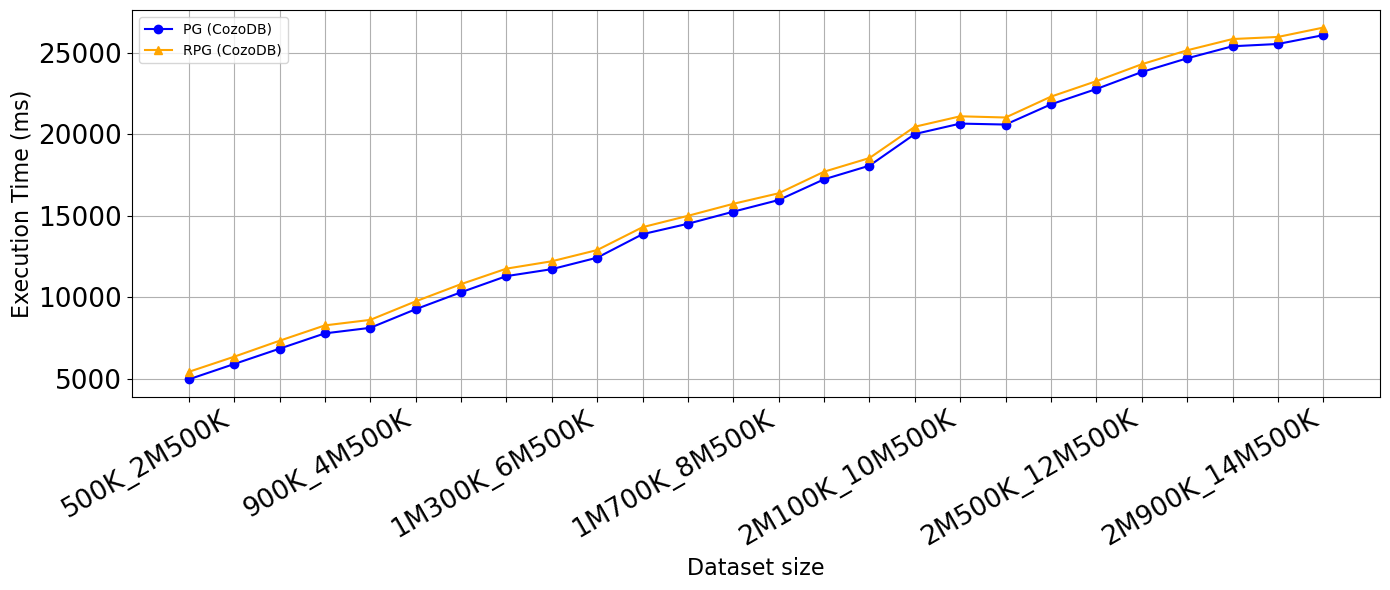

In [3]:
#visualization

import pandas as pd
import matplotlib.pyplot as plt

file_path = "CozoPG_vs_CozoRPG_R3.xlsx"
df = pd.read_excel(file_path)

# Supprimer la dernière ligne
df = df.iloc[:-1]

plt.figure(figsize=(14, 6))

# Tracer les courbes
plt.plot(df['DS_size'], df['CozoPG'], marker='o', color='blue', label='PG (CozoDB)')
plt.plot(df['DS_size'], df['CozoRPG'], marker='^', color='orange', label='RPG (CozoDB)')

# Choisir les labels que tu veux garder visibles
labels_to_show = [
    '100K_500K',
    '500K_2M500K',
    '900K_4M500K',
    '1M300K_6M500K',
    '1M700K_8M500K',
    '2M100K_10M500K',
    '2M500K_12M500K',
    '2M900K_14M500K'
]

# Construire la liste des ticks
xticks = range(len(df['DS_size']))
xticklabels = [lbl if lbl in labels_to_show else "" for lbl in df['DS_size']]

plt.xticks(ticks=xticks, labels=xticklabels, rotation=30, ha='right', fontsize=19)
plt.yticks(fontsize=19)

# Ajouter titre et axes

plt.xlabel("Dataset size", fontsize=16)
plt.ylabel("Execution Time (ms)", fontsize=16)

plt.legend()
plt.grid(True)
plt.tight_layout()

# Sauvegarder le graphique
plt.savefig("graph_CozoPG_vs_CozoRPG_R3.png", dpi=300)
plt.show()

In [ ]:
#Q4 Places of users using Chrome browser. 

#Cozo : 
?[placeName] :=
  *node_label[person, "person"],
  *node_prop[person, "browserUsed", "Chrome"],
  *edge[e, person, place],
  *edge_label[e, "isLocatedIn"],
  *node_prop[place, "name", placeName]
#noe4j : 

MATCH (p:PERSON)-[:ISLOCATEDIN]->(place:PLACE)
WHERE p.browserUsed = "Chrome"
RETURN place.name AS placeName


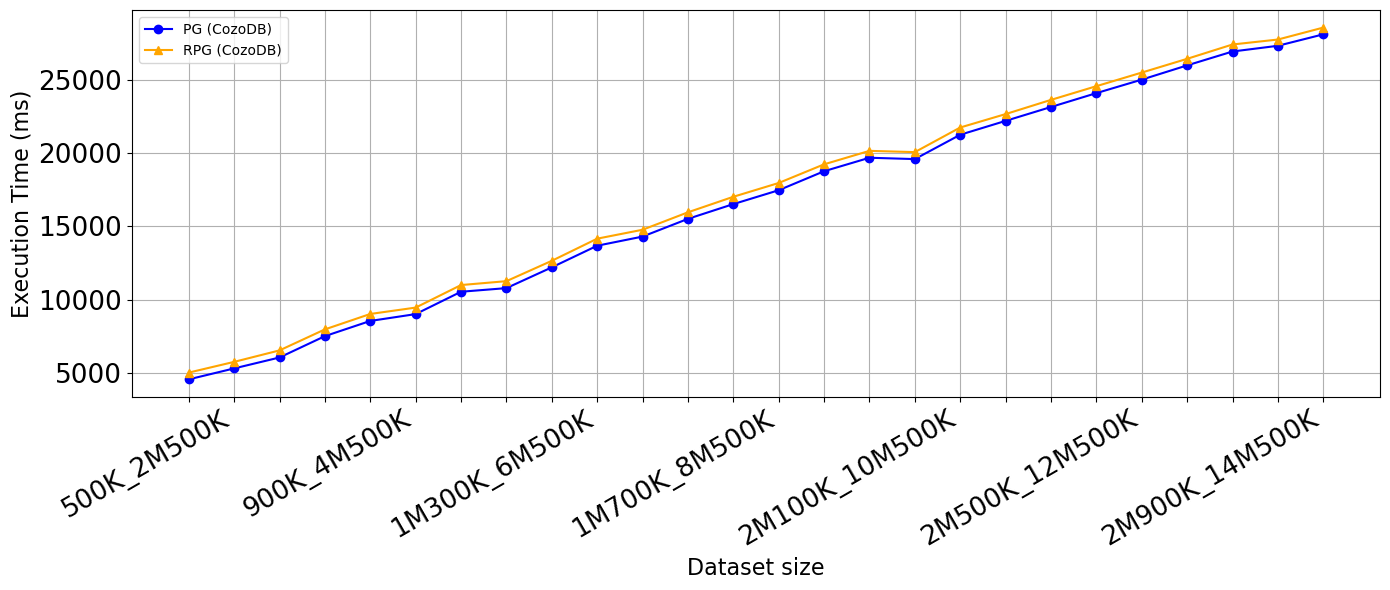

In [4]:
#visualization

import pandas as pd
import matplotlib.pyplot as plt

file_path = "CozoPG_vs_CozoRPG_R4.xlsx"
df = pd.read_excel(file_path)

# Supprimer la dernière ligne
df = df.iloc[:-1]

plt.figure(figsize=(14, 6))

# Tracer les courbes
plt.plot(df['DS_size'], df['CozoPG'], marker='o', color='blue', label='PG (CozoDB)')
plt.plot(df['DS_size'], df['CozoRPG'], marker='^', color='orange', label='RPG (CozoDB)')

# Choisir les labels que tu veux garder visibles
labels_to_show = [
    '100K_500K',
    '500K_2M500K',
    '900K_4M500K',
    '1M300K_6M500K',
    '1M700K_8M500K',
    '2M100K_10M500K',
    '2M500K_12M500K',
    '2M900K_14M500K'
]

# Construire la liste des ticks
xticks = range(len(df['DS_size']))
xticklabels = [lbl if lbl in labels_to_show else "" for lbl in df['DS_size']]

plt.xticks(ticks=xticks, labels=xticklabels, rotation=30, ha='right', fontsize=19)
plt.yticks(fontsize=19)

# Ajouter titre et axes

plt.xlabel("Dataset size", fontsize=16)
plt.ylabel("Execution Time (ms)", fontsize=16)

plt.legend()
plt.grid(True)
plt.tight_layout()

# Sauvegarder le graphique
plt.savefig("graph_CozoPG_vs_CozoRPG_R4.png", dpi=300)
plt.show()

In [ ]:
#Q5 Find the reply chain of all comments that are reachablefrom a given comment by one or more replyOf edges, where all nodes have the label comment. 
#cozo : 

 # Base case: direct reply between two comments 
reply_chain[src, dst] :=
    *edge_label[e, "replyOf"],
   *edge[e, src, dst],
    *node_label[dst, "comment"]
 # Recursive case: transitive closure of replyOf
 reply_chain[src, dst] :=
     reply_chain[src, mid],
    *edge_label[e, "replyOf"],
    *edge[e, mid, dst],
    *node_label[dst, "comment"]
 # Main query: reply chains between a given comment  and its comments

?[chain_comment] := reply_chain[given_comment, chain_comment], given_comment =53
 

#neo4j : 
MATCH (given_comment:COMMENT {id: 53})
MATCH (given_comment)-[:REPLYOF*]->(chain_comment:COMMENT)
RETURN chain_comment



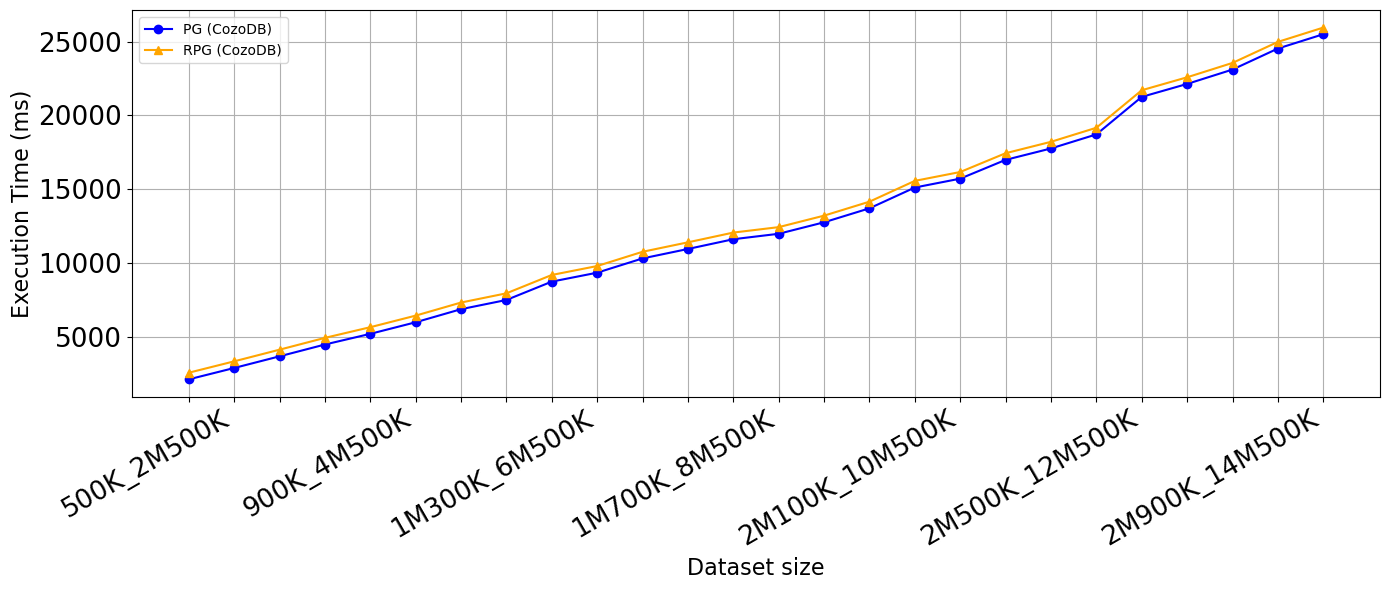

In [5]:
#visualization
import pandas as pd
import matplotlib.pyplot as plt

file_path = "CozoPG_vs_CozoRPG_R5.xlsx"
df = pd.read_excel(file_path)

# Supprimer la dernière ligne
df = df.iloc[:-1]

plt.figure(figsize=(14, 6))

# Tracer les courbes
plt.plot(df['DS_size'], df['CozoPG'], marker='o', color='blue', label='PG (CozoDB)')
plt.plot(df['DS_size'], df['CozoRPG'], marker='^', color='orange', label='RPG (CozoDB)')

# Choisir les labels que tu veux garder visibles
labels_to_show = [
    '100K_500K',
    '500K_2M500K',
    '900K_4M500K',
    '1M300K_6M500K',
    '1M700K_8M500K',
    '2M100K_10M500K',
    '2M500K_12M500K',
    '2M900K_14M500K'
]

# Construire la liste des ticks
xticks = range(len(df['DS_size']))
xticklabels = [lbl if lbl in labels_to_show else "" for lbl in df['DS_size']]

plt.xticks(ticks=xticks, labels=xticklabels, rotation=30, ha='right', fontsize=19)
plt.yticks(fontsize=19)

# Ajouter titre et axes

plt.xlabel("Dataset size", fontsize=16)
plt.ylabel("Execution Time (ms)", fontsize=16)

plt.legend()
plt.grid(True)
plt.tight_layout()

# Sauvegarder le graphique
plt.savefig("graph_CozoPG_vs_CozoRPG_R5.png", dpi=300)
plt.show()